# Introduction of image processing

1. Importing the image
1. Building the process plan
1. Applying the plan to whole data

## Import libraries

1. Mathematical calculation
    - Numpy (https://numpy.org/)
1. Manipulating the image data
    - OpenCV (https://opencv.org/)
    - scikit-image (https://scikit-image.org/)
1. Plotting the data
    - Matplotlib (https://matplotlib.org/)
1. Manipulating as database
    - Pandas (https://pandas.pydata.org/)

In [1]:
# Mathematical calculations (matrix, min, max)
import numpy as np

# Manipulating the image data (color, registration, filter)
import cv2
import skimage

# Plotting, Make an animation
import matplotlib
# import specific modules (for efficiency)
from matplotlib import pyplot as plt
plt.style.use('default')

## Basic plot

Shape of image: (895, 946, 3) # x, y, value at pixel
Value at (450 px, 450 px): [145  73  35] # Original data


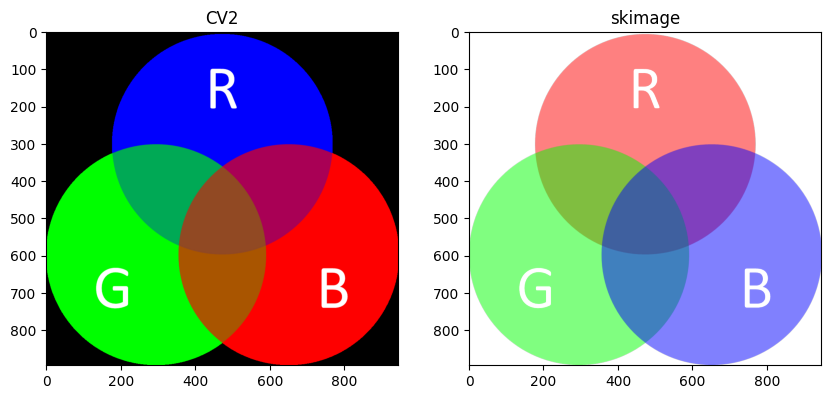

In [2]:
# Image IO
import cv2
img_cv2=cv2.imread('examples\RGB_circles.png')
print('Shape of image: ' + str(img_cv2.shape) + ' # x, y, value at pixel')
print('Value at (450 px, 450 px): '+ str(img_cv2[450][450]) + ' # Original data')

# #CV2 reads the image based on Blue-Green-Red
# img_cv2=cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB) #Convert the data
# print('Value at (450 px, 450 px): '+ str(img_cv2[450][450]) + ' # After conversion')

from skimage.io import imread
img_skimage=imread('examples\RGB_circles.png')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].imshow(img_cv2)
ax[0].set_title('CV2: BGR')
ax[1].imshow(img_skimage)
ax[1].set_title('skimage: RGB')
plt.show()

Shape of image: (895, 946, 3) # x, y, value at pixel
Value at (450 px, 450 px): [145  73  35] # Original data


Shape of grayscale image: (895, 946) # x, y, value at pixel
Value at (450 px, 450 px): 70 # To gray conversion


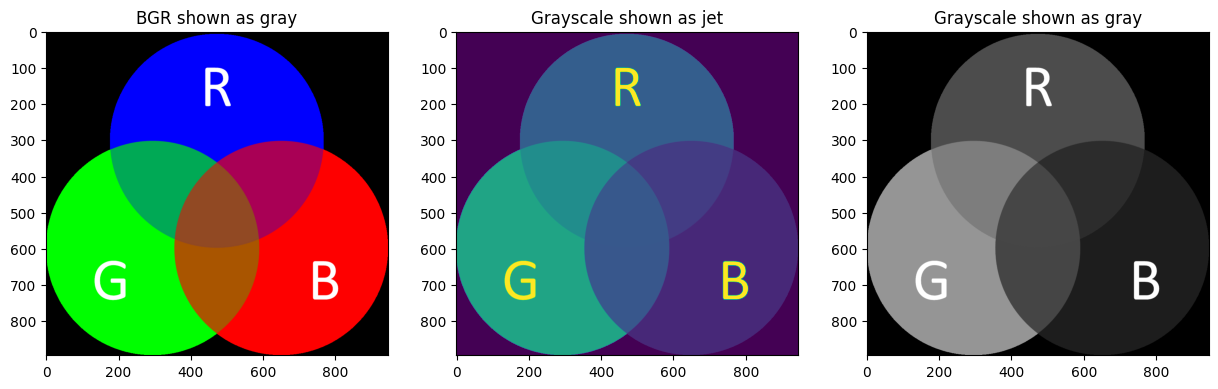

In [6]:
# Color and gray image
img_cv2=cv2.imread('examples\RGB_circles.png')
print('Shape of image: ' + str(img_cv2.shape) + ' # x, y, value at pixel')
print('Value at (450 px, 450 px): '+ str(img_cv2[450][450]) + ' # Original data')
print('\n')

img_cv2_gray=cv2.cvtColor(img_cv2, cv2.COLOR_BGR2GRAY) #Convert the data
print('Shape of grayscale image: ' + str(img_cv2_gray.shape) + ' # x, y, value at pixel')
print('Value at (450 px, 450 px): '+ str(img_cv2_gray[450][450]) + ' # To gray conversion')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax[0].imshow(img_cv2, cmap='gray')
ax[0].set_title('BGR shown as gray')
ax[1].imshow(img_cv2_gray)
ax[1].set_title('Grayscale shown as jet')
ax[2].imshow(img_cv2_gray, cmap='gray')
ax[2].set_title('Grayscale shown as gray')
plt.show()

- image can be shown as color, even the data is grayscale by the colormap
- Grayscale: 0 (Black) --- 255 (White)
- Jet: 0 (Blue) --- 127 (Green) --- 255 (Red)

## Build plan

(1024, 1376)


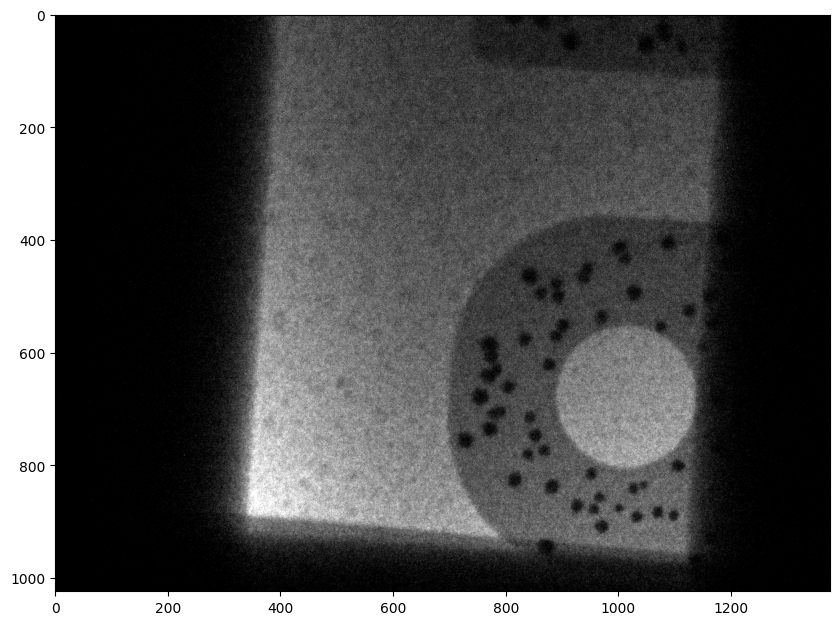

In [7]:
ori_img=imread('examples\Cu_TiNx.tif')
print(ori_img.shape)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.imshow(ori_img, cmap='gray')

- Which features can be extraced?

## Basic: Binary image

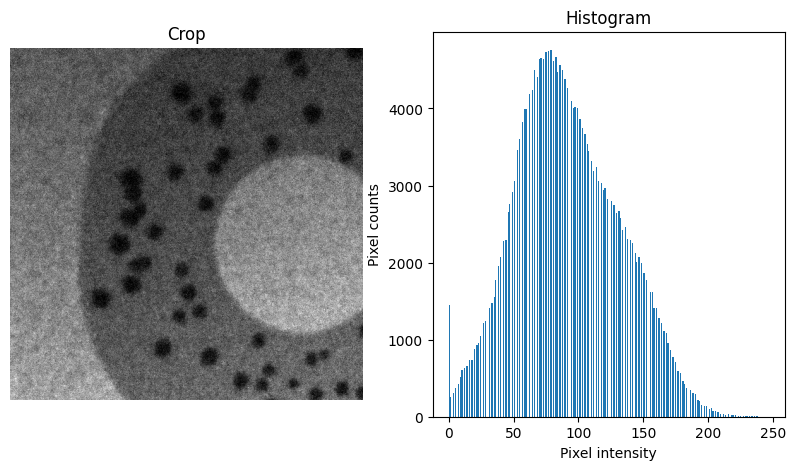

In [8]:
crop_img=ori_img[400:900,600:1100]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].imshow(crop_img, cmap='gray')
ax[0].set_title('Crop')
ax[0].axis('off')

ax[1].hist(crop_img.ravel(), bins=255)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Pixel intensity')
ax[1].set_ylabel('Pixel counts')

plt.show()

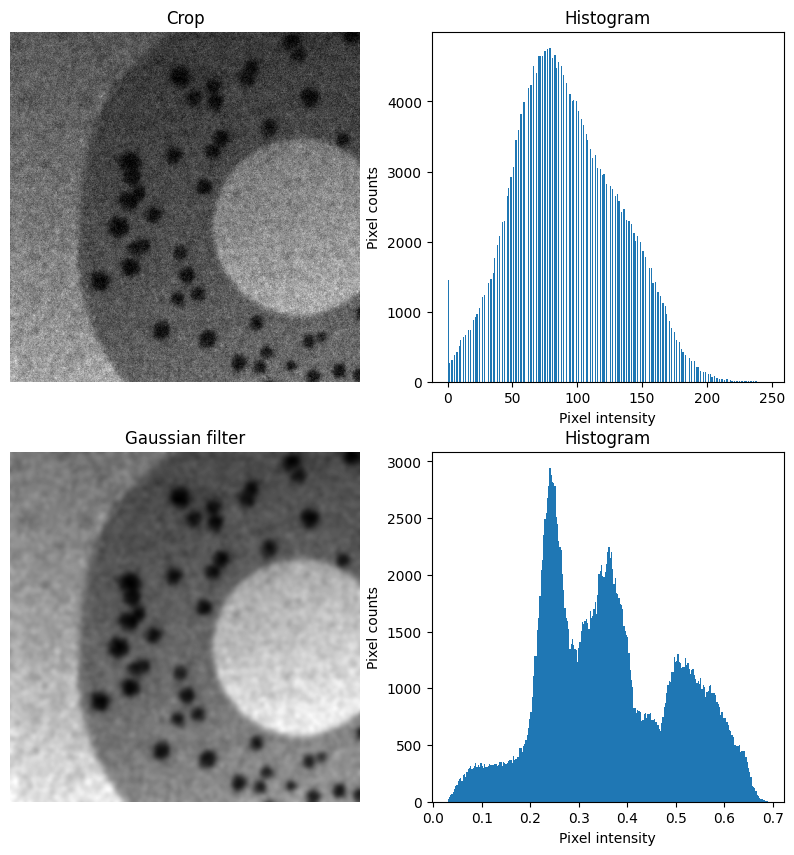

In [9]:
from skimage.filters import gaussian
gaus_img=gaussian(crop_img, 3)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0][0].imshow(crop_img, cmap='gray')
ax[0][0].set_title('Crop')
ax[0][0].axis('off')

ax[0][1].hist(crop_img.ravel(), bins=255)
ax[0][1].set_title('Histogram')
ax[0][1].set_xlabel('Pixel intensity')
ax[0][1].set_ylabel('Pixel counts')

ax[1][0].imshow(gaus_img, cmap='gray')
ax[1][0].set_title('Gaussian filter')
ax[1][0].axis('off')

ax[1][1].hist(gaus_img.ravel(), bins=255)
ax[1][1].set_title('Histogram')
ax[1][1].set_xlabel('Pixel intensity')
ax[1][1].set_ylabel('Pixel counts')

plt.show()

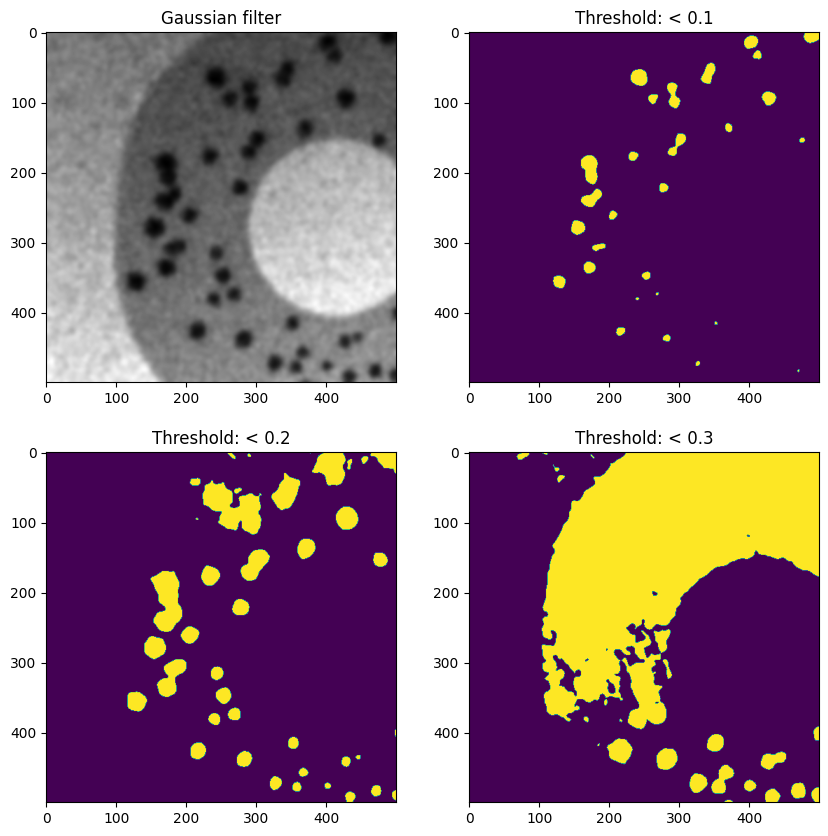

In [10]:
thres_img_1=gaus_img<0.1
thres_img_2=gaus_img<0.2
thres_img_3=gaus_img<0.3

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0][0].imshow(gaus_img, cmap='gray')
ax[0][0].set_title('Gaussian filter')
ax[0][1].imshow(thres_img_1)
ax[0][1].set_title('Threshold: < 0.1')
ax[1][0].imshow(thres_img_2)
ax[1][0].set_title('Threshold: < 0.2')
ax[1][1].imshow(thres_img_3)
ax[1][1].set_title('Threshold: < 0.3')
plt.show()

## Advanced: subtraction from reference

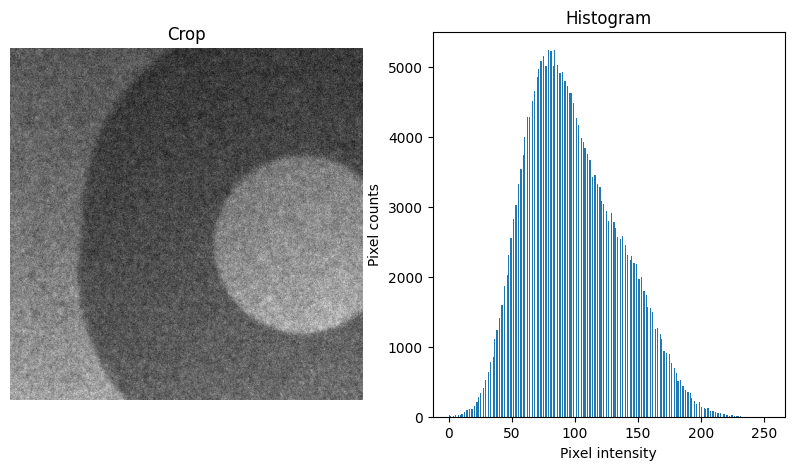

In [14]:
ref_img=imread('examples\Cu_TiNx_ref.tif')[400:900,600:1100]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].imshow(ref_img, cmap='gray')
ax[0].set_title('Crop')
ax[0].axis('off')

ax[1].hist(ref_img.ravel(), bins=255)
ax[1].set_title('Histogram')
ax[1].set_xlabel('Pixel intensity')
ax[1].set_ylabel('Pixel counts')

plt.show()

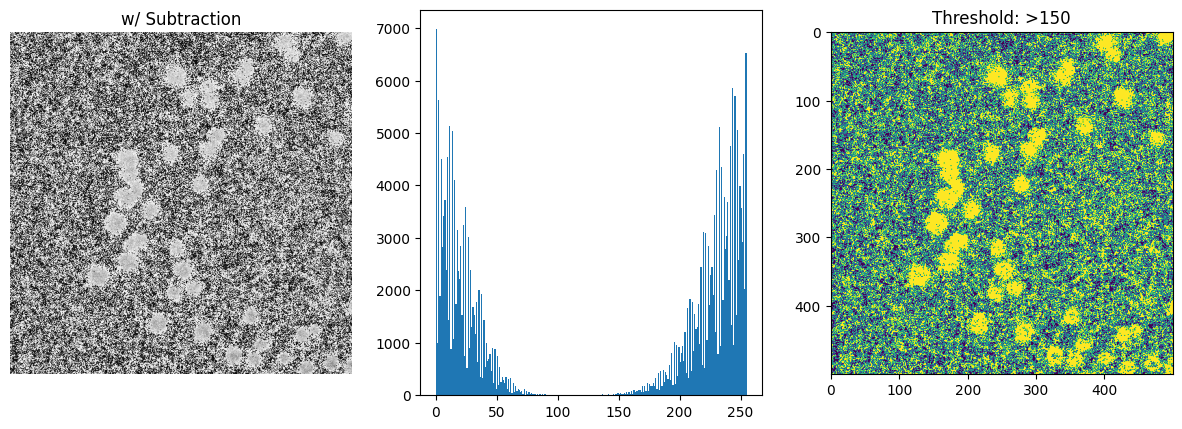

In [15]:
subt_img=crop_img-ref_img

fig=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(131)
ax1.imshow(subt_img, cmap='gray')
ax1.set_title('w/ Subtraction')
ax1.axis('off')
ax2=fig.add_subplot(132)
ax2.hist(subt_img.ravel(), bins=255)

ax3=fig.add_subplot(133)
ax3.imshow(subt_img>150)
ax3.set_title('Threshold: >150')

plt.show()

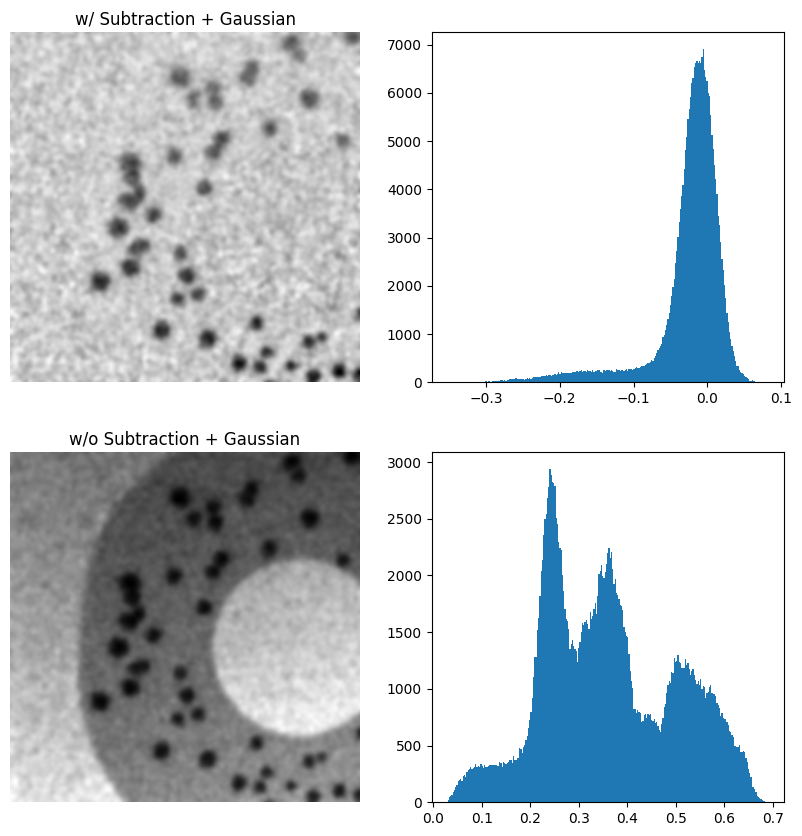

In [16]:
subt_gaus_img=gaussian(crop_img,3)-gaussian(ref_img,3)

fig=plt.figure(figsize=(10,10))

ax1=fig.add_subplot(221)
ax1.imshow(subt_gaus_img, cmap='gray')
ax1.set_title('w/ Subtraction + Gaussian')
ax1.axis('off')
ax2=fig.add_subplot(222)
ax2.hist(subt_gaus_img.ravel(), bins=255)

ax3=fig.add_subplot(223)
ax3.imshow(gaus_img, cmap='gray')
ax3.set_title('w/o Subtraction + Gaussian')
ax3.axis('off')
ax4=fig.add_subplot(224)
ax4.hist(gaus_img.ravel(), bins=255)

plt.show()

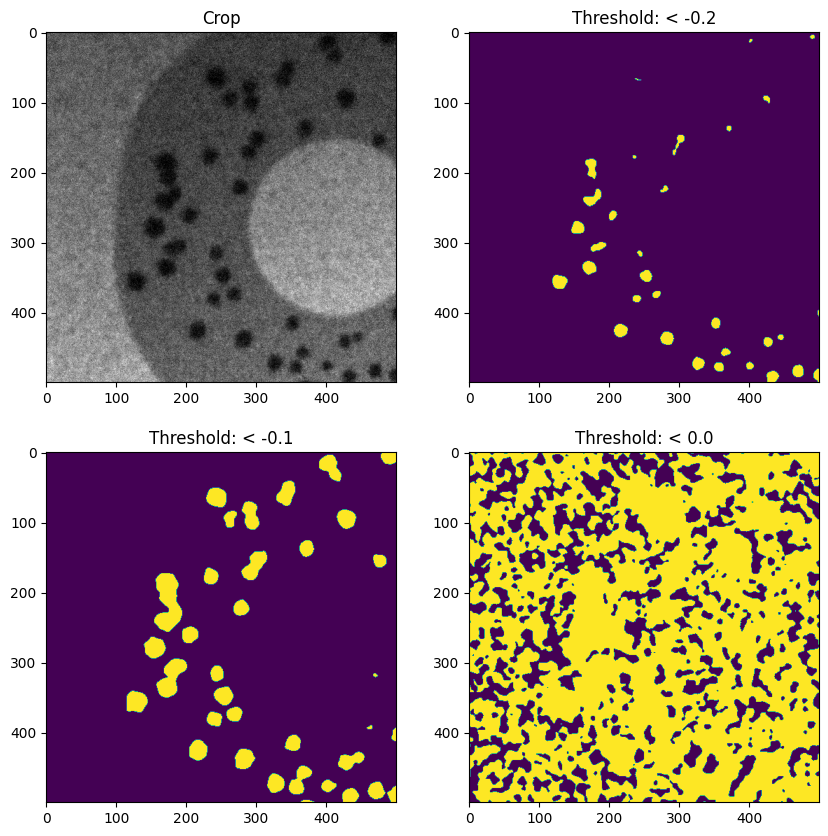

In [17]:
subt_thres_img_1=subt_gaus_img<-0.2
subt_thres_img_2=subt_gaus_img<-0.1
subt_thres_img_3=subt_gaus_img<0.0

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
ax[0][0].imshow(crop_img, cmap='gray')
ax[0][0].set_title('Crop')
ax[0][1].imshow(subt_thres_img_1)
ax[0][1].set_title('Threshold: < -0.2')
ax[1][0].imshow(subt_thres_img_2)
ax[1][0].set_title('Threshold: < -0.1')
ax[1][1].imshow(subt_thres_img_3)
ax[1][1].set_title('Threshold: < 0.0')
plt.show()

## Segmentation

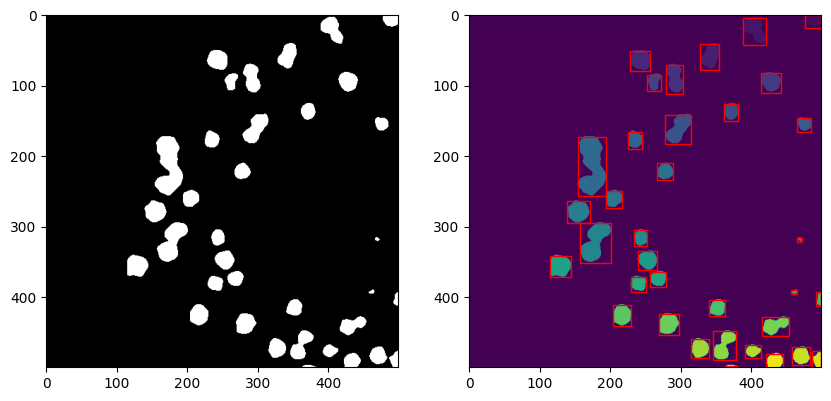

In [18]:
from skimage.measure import label, regionprops
label_img=label(subt_thres_img_2)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(subt_thres_img_2, cmap='gray')
ax[1].imshow(label_img)                 

import matplotlib.patches as mpatches

for region in regionprops(label_img):
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=1)
    ax[1].add_patch(rect)

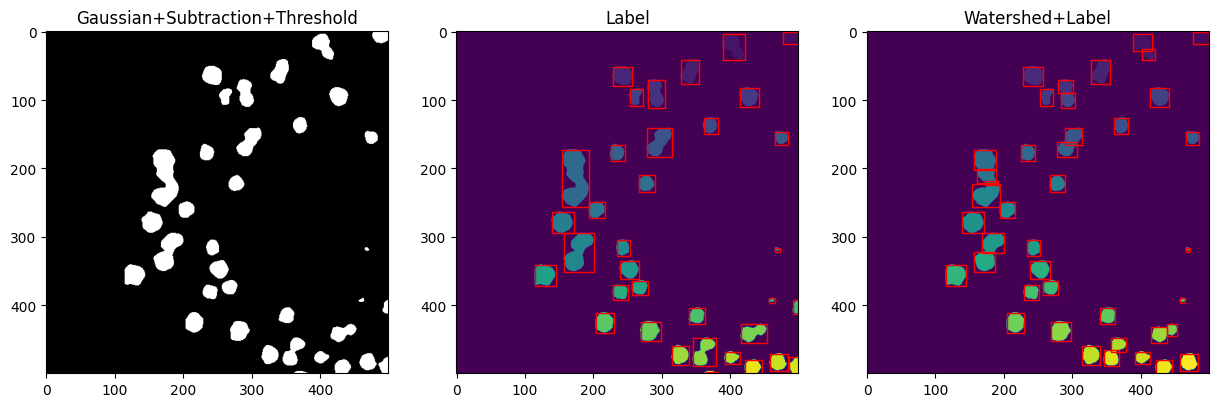

In [19]:
from skimage.segmentation import watershed
from skimage.measure import label, regionprops
from skimage.feature import peak_local_max
from scipy import ndimage as ndi

def watershed_process(image):
    distance = ndi.distance_transform_edt(image)
    coords = peak_local_max(distance, min_distance=15, footprint=np.ones((3, 3)), labels=image)
    mask = np.zeros(distance.shape, dtype=bool)
    mask[tuple(coords.T)] = True
    markers, _ = ndi.label(mask)
    label_img = watershed(-distance, markers, mask=image)
    return label_img

label_water_img = watershed_process(subt_thres_img_2)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(subt_thres_img_2, cmap='gray')
ax[0].set_title('Gaussian+Subtraction+Threshold')
ax[1].imshow(label_img)
ax[1].set_title('Label')
ax[2].imshow(label_water_img)
ax[2].set_title('Watershed+Label')

import matplotlib.patches as mpatches

for region in regionprops(label_img):
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=1)
    ax[1].add_patch(rect)

for region in regionprops(label_water_img):
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=1)
    ax[2].add_patch(rect)

plt.show()

## Measuring

In [20]:
from skimage.measure import regionprops

props=regionprops(label_water_img)

for prop in region:
    print(prop)   #, region[prop])

area
area_bbox
area_convex
area_filled
axis_major_length
axis_minor_length
bbox
centroid
centroid_local
coords
eccentricity
equivalent_diameter_area
euler_number
extent
feret_diameter_max
image
image_convex
image_filled
inertia_tensor
inertia_tensor_eigvals
label
moments
moments_central
moments_hu
moments_normalized
orientation
perimeter
perimeter_crofton
slice
solidity


In [21]:
import pandas as pd

from skimage.measure import regionprops_table

properties=['bbox', 'area']
props = regionprops_table(label_water_img, subt_thres_img_2, properties)
#props = regionprops_table(label_water_img, None ,properties)

df=pd.DataFrame(props)

df

#df.head(10) # print top 10 rows

#df.describe() # Summary the dataframe

#df.iloc[10] # Row selection

#df['area'] # Column selection

#df.count() # Counting

#df[df['area']>500] # filtering

,bbox-0,bbox-1,bbox-2,bbox-3,area
0,0,477,18,500,358
1,4,389,28,417,509
2,26,402,42,421,227
3,41,328,77,355,668
4,51,228,79,257,656
5,70,279,90,301,347
6,84,253,108,272,322
7,82,414,110,442,584
8,90,283,111,304,364
9,126,361,150,382,384


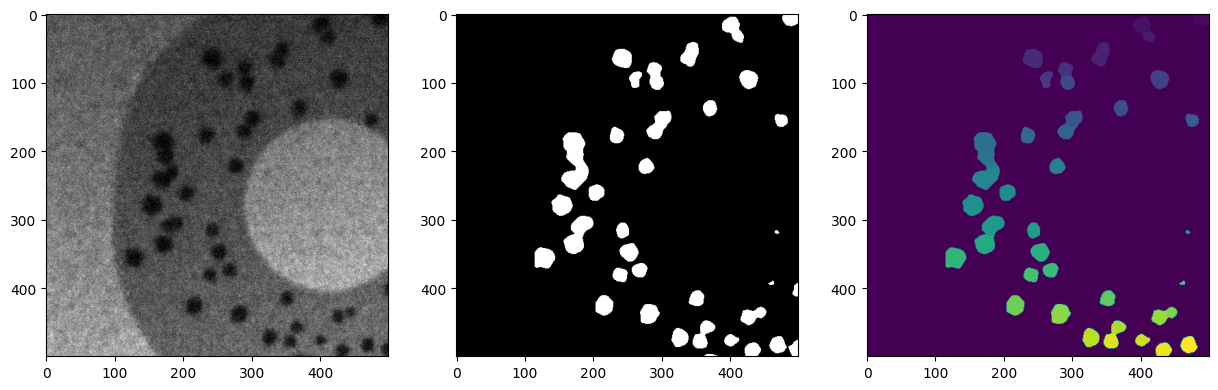

In [22]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(crop_img, cmap='gray')
ax[1].imshow(subt_thres_img_2, cmap='gray')
ax[2].imshow(label_water_img)
#fig.savefig('graph_img.png')